# SMS Spam Classifier: Multinomial Naive Bayes

### Importing and preprocessing data

In [64]:
import pandas as pd
import numpy as np

In [65]:
docs=pd.read_table('SMSSpamCollection',header=None, names=['label','sms'])
docs.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
print(len(docs))
docs.label.value_counts()

5572


ham     4825
spam     747
Name: label, dtype: int64

In [67]:
# binary mapping
docs['label']=docs.label.map({'ham':0,'spam':1})
docs.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
# convert to X and y
X=docs['sms']
y=docs['label']
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [69]:
# split into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3)

In [70]:
print(X_train.size)
print(X_test.size)

3900
1672


### Building model

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer(stop_words='english')
vec.fit(X_train)
print(vec.vocabulary_)
X_train_transformed=vec.transform(X_train)
X_test_transformed=vec.transform(X_test)

{'ok': 4411, 'waliking': 6628, 'ard': 961, 'wan': 6640, 'buy': 1440, 'ur': 6485, 'house': 3176, 'reassuring': 5052, 'crazy': 1869, 'world': 6821, 'tell': 6086, 'thats': 6140, 'okay': 4412, 'going': 2872, 'ikea': 3254, 'str': 5864, 'aft': 800, 'dat': 1966, 'tired': 6213, 'haven': 3038, 'slept': 5609, 'past': 4577, 'nights': 4301, 'oh': 4406, 'prob': 4881, 'aluable': 862, 'ffectionate': 2552, 'oveable': 4504, 'ternal': 6105, 'oble': 4381, 'ruthful': 5278, 'ntimate': 4354, 'atural': 1046, 'namous': 4225, 'happy': 3016, 'valentines': 6522, 'day': 1975, 'advance': 781, 'wow': 6837, 'gay': 2799, 'firmware': 2598, 'update': 6476, 'help': 3073, 'juz': 3491, 'lar': 3622, 'important': 3278, 'customer': 1926, 'service': 5436, 'announcement': 900, 'premier': 4833, 'freephone': 2706, '0800': 50, '542': 534, '0578': 19, 'missing': 4067, 'pray': 4823, 'inshah': 3329, 'allah': 849, 'did': 2088, 'posted': 4792, 'facebook': 2480, 'good': 2881, 'free': 2700, 'msg': 4161, 'sorry': 5699, 'ordered': 4467, '

In [72]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train_transformed,y_train)
#predicting class
y_pred_class=mnb.predict(X_test_transformed)

#predicting probabilities
y_pred_proba=mnb.predict_proba(X_test_transformed)

### Model Evaluation

In [73]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.9874401913875598

In [74]:
confusion=metrics.confusion_matrix(y_test,y_pred_class)
confusion

array([[1445,    6],
       [  15,  206]], dtype=int64)

In [75]:
TN=confusion[0,0]
TP=confusion[1,1]
FP=confusion[0,1]
FN=confusion[1,0]

In [76]:
sensitivity=TP/float(FN+TP)
print("Sensitivity is",sensitivity)

Sensitivity is 0.9321266968325792


In [77]:
specificity=TN/float(FP+TN)
print("specificity is",specificity)

specificity is 0.9958649207443143


In [78]:
Precision=TP/float(FP+TP)
print("Precision is",Precision)

Precision is 0.9716981132075472


In [79]:
print("precision",Precision)
print("precision_score",metrics.precision_score(y_test,y_pred_class))
print("recall_score",metrics.recall_score(y_test,y_pred_class))
print("f1_score",metrics.f1_score(y_test,y_pred_class))

precision 0.9716981132075472
precision_score 0.9716981132075472
recall_score 0.9321266968325792
f1_score 0.9515011547344112


In [80]:
# creating roc curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred_proba[:,1])
roc_auc=auc(false_positive_rate,true_positive_rate)

#area under the curve
print(roc_auc)

0.9838931490530793


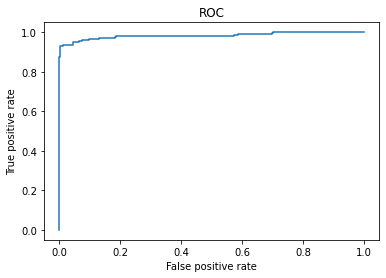

In [81]:
#plotting roc curve
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.title("ROC")
plt.plot(false_positive_rate,true_positive_rate)